In [101]:
# Kaggle Competition-02

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('Display.max_columns',100)

In [103]:
# Load Dataset

In [104]:
df1=pd.read_csv('/kaggle/input/titanic/train.csv')
df2=pd.read_csv('/kaggle/input/titanic/test.csv')

# Exploratory Data analysis

In [105]:
df1.shape,df2.shape

((891, 12), (418, 11))

In [106]:
df1.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [107]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [108]:
df=df1.append(df2)

In [109]:
result=pd.DataFrame()
result['PassengerId']=df2['PassengerId']

In [111]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [112]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


# Feature Engineering

In [113]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [114]:
#remove dulpicate entries

In [115]:
duplicates = df.duplicated()
duplicates.unique() # no duplicate entries

array([False])

In [116]:
df['Fare'].mean()

33.29547928134557

In [117]:
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

<Axes: xlabel='Embarked', ylabel='count'>

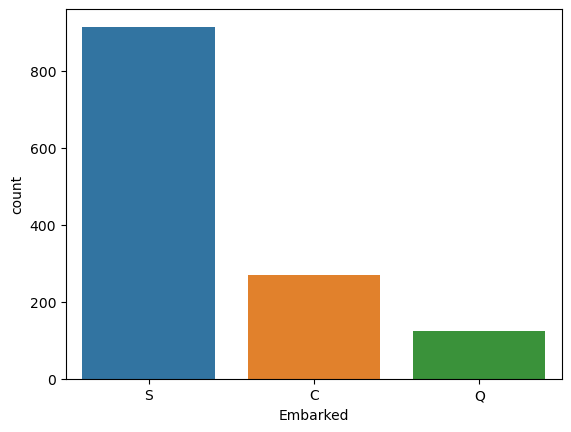

In [118]:
sns.countplot(x=df['Embarked'])

In [119]:
df['Embarked']=df['Embarked'].fillna('S')


In [120]:
df.loc[:,['Cabin','Fare']]

,Cabin,Fare
0,NaN,7.2500
1,C85,71.2833
2,NaN,7.9250
3,C123,53.1000
4,NaN,8.0500
...,...,...
413,NaN,8.0500
414,C105,108.9000
415,NaN,7.2500
416,NaN,8.0500


In [121]:
# df2=df.dropna()
# df2.loc[:,['Cabin','Fare']].transpose()

In [122]:
df=df.drop('Cabin',axis=1)

In [123]:
# age is to be filled

In [124]:
df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [125]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [126]:
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title']=df['Title'].replace(['Rev','Jonkheer','Don','Sir','Major','Dr','Capt','Col'],'Mr')

In [127]:
df['Title'].value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

In [128]:
df.groupby('Title')['Age'].median()

Title
Master     4.0
Miss      22.0
Mr        30.0
Mrs       35.5
Name: Age, dtype: float64

In [129]:
df['Age']=df['Age'].fillna(df.groupby('Title')['Age'].transform('median'))

In [130]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [131]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,S,Mr
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,Mrs
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr
416,1308,NaN,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,S,Mr


In [132]:
df['Family']=1+df['SibSp']+df['Parch']

<Axes: xlabel='Family', ylabel='count'>

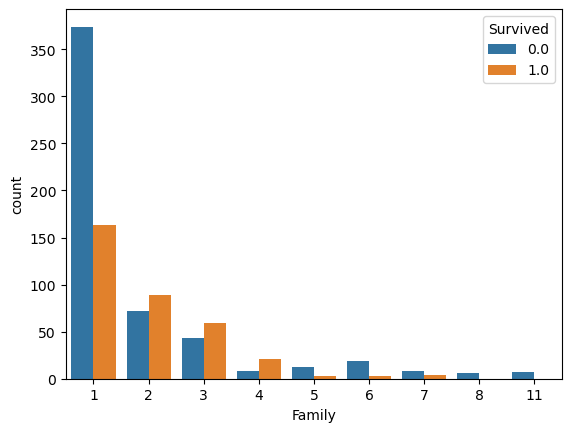

In [133]:
sns.countplot(x=df['Family'],hue=df['Survived'])

In [134]:
df.drop(['PassengerId','Name','Ticket','Parch','SibSp'],axis=1,inplace=True)

In [135]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,0.0,3,male,22.0,7.2500,S,Mr,2
1,1.0,1,female,38.0,71.2833,C,Mrs,2
2,1.0,3,female,26.0,7.9250,S,Miss,1
3,1.0,1,female,35.0,53.1000,S,Mrs,2
4,0.0,3,male,35.0,8.0500,S,Mr,1


In [136]:
data=pd.get_dummies(df,drop_first=True)

In [137]:
data.head()

,Survived,Pclass,Age,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,7.2500,2,1,0,1,0,1,0
1,1.0,1,38.0,71.2833,2,0,0,0,0,0,1
2,1.0,3,26.0,7.9250,1,0,0,1,1,0,0
3,1.0,1,35.0,53.1000,2,0,0,1,0,0,1
4,0.0,3,35.0,8.0500,1,1,0,1,0,1,0


# modelling

In [138]:
train=data[:891]
test=data[891:]

In [139]:
train.tail()

,Survived,Pclass,Age,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
886,0.0,2,27.0,13.00,1,1,0,1,0,1,0
887,1.0,1,19.0,30.00,1,0,0,1,1,0,0
888,0.0,3,22.0,23.45,4,0,0,1,1,0,0
889,1.0,1,26.0,30.00,1,1,0,0,0,1,0
890,0.0,3,32.0,7.75,1,1,1,0,0,1,0


In [140]:
x=train.drop('Survived',axis=1)
y=train['Survived']

In [141]:
x.isnull().sum()

Pclass        0
Age           0
Fare          0
Family        0
Sex_male      0
Embarked_Q    0
Embarked_S    0
Title_Miss    0
Title_Mr      0
Title_Mrs     0
dtype: int64

In [142]:
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
g=GaussianNB()
lr=LogisticRegression()
dc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
svc=SVC()

In [153]:
 !pip install xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [154]:
xgb.fit(x,y)
pred=xgb.predict(test.drop('Survived',axis=1))
result['Survived']=pred.astype('int64')
result 

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [155]:
result.to_csv('Titanic.csv',index=False)

In [146]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
